In [33]:
%matplotlib inline

import os
from astropy.io import fits
import pandas as pd

import sys
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.afw.geom as afwGeom
import lsst.daf.persistence as dafPersist

## Today we'll use astropy to load a FITS table file, which has information about variable sources found in the HiTS DR1.

In [3]:
datadir = '/epyc/users/mrawls/premap2019/hits-dr1'
filename = 'HiTS_DR1_variables_DM-dataset-subset.fits'
filepath = os.path.join(datadir, filename)

In [4]:
#alt_filepath = datair + '/' + filename  # same idea
print(filepath)

/epyc/users/mrawls/premap2019/hits-dr1/HiTS_DR1_variables_DM-dataset-subset.fits


In [5]:
table = fits.open(filepath)

In [11]:
header = table[1].header

In [22]:
columns = table[1].columns
columns

ColDefs(
    name = 'ID'; format = '17A'
    name = 'internalID'; format = '25A'
    name = 'raMedian'; format = 'D'
    name = 'decMedian'; format = 'D'
    name = 'Variable_prob'; format = 'D'
    name = 'Periodic_prob'; format = 'D'
    name = 'DSCT_Prob'; format = 'E'
    name = 'EB_Prob'; format = 'D'
    name = 'ROTVAR_Prob'; format = 'D'
    name = 'RRLYR_Prob'; format = 'E'
    name = 'CV_Prob'; format = 'D'
    name = 'QSO_Prob'; format = 'D'
    name = 'SNe_Prob'; format = 'E'
    name = 'Predicted_class'; format = '6A'
    name = 'ID_feat'; format = '17A'
    name = 'raMedian_feat'; format = 'D'
    name = 'decMedian_feat'; format = 'D'
    name = 'Amplitude'; format = 'D'
    name = 'AndersonDarling'; format = 'D'
    name = 'Autocor_length'; format = 'E'
    name = 'Beyond1Std'; format = 'D'
    name = 'CAR_mean'; format = 'D'
    name = 'CAR_sigma'; format = 'D'
    name = 'CAR_tau'; format = 'D'
    name = 'Con'; format = 'D'
    name = 'Eta_e'; format = 'D'
    name = '

In [31]:
ptable = pd.DataFrame(table[1].data)

In [32]:
ptable

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,g-i,g-r,r-i
0,HiTS095611+020452,Blind15A_26_N1_1715_0146,149.048038,2.081381,0.523601,0.202651,NaN,NaN,NaN,NaN,...,0.246009,-0.584446,0.134705,2.100608,0.032812,0.773151,0.738233,2.859381,1.439736,1.419645
1,HiTS095645+021135,Blind15A_26_N1_0181_2093,149.190225,2.193068,0.564932,0.635018,0.400,0.100,0.375,0.125,...,0.119267,-0.133774,0.067353,-0.444997,0.123052,0.841553,0.815632,0.996040,0.769289,0.226751
2,HiTS095652+023537,Blind15A_26_S14_1446_0379,149.220445,2.593841,0.962477,0.635836,0.025,0.125,0.750,0.100,...,0.227995,-0.317121,0.269410,-0.008631,0.067782,0.849505,0.846981,1.911452,1.484048,0.427403
3,HiTS095702+023628,Blind15A_26_S14_1253_0945,149.261780,2.607883,0.532390,0.933333,0.550,0.225,0.050,0.175,...,0.179956,-0.288333,0.067353,-1.067079,0.181790,0.853063,0.754798,NaN,NaN,NaN
4,HiTS095726+015556,Blind15A_26_N8_1496_2317,149.361376,1.932343,0.972280,0.889344,0.050,0.175,0.625,0.150,...,0.269737,-0.035972,0.740878,-1.731678,0.089139,0.957841,0.948092,1.185192,0.894064,0.291128
5,HiTS095734+015351,Blind15A_26_N8_1969_2775,149.394743,1.897668,0.598832,0.599606,0.125,0.100,0.625,0.150,...,0.329299,0.539946,0.134968,-0.766400,0.153570,0.832765,0.787815,NaN,NaN,NaN
6,HiTS095744+013651,Blind15A_26_N20_1353_1224,149.437020,1.614256,0.533333,0.178671,NaN,NaN,NaN,NaN,...,0.383120,0.330780,0.875583,-1.138970,0.041694,0.837442,0.851982,0.748577,0.506526,0.242052
7,HiTS095746+015823,Blind15A_26_N8_0935_3426,149.442257,1.973122,0.566527,0.137593,NaN,NaN,NaN,NaN,...,0.317224,-0.241419,0.067353,0.057702,0.057157,0.788684,0.694821,2.492673,1.334213,1.158460
8,HiTS095801+014018,Blind15A_26_N20_0559_2169,149.505980,1.671866,0.500000,0.369948,NaN,NaN,NaN,NaN,...,0.203447,0.224160,0.740878,0.569190,0.114904,0.868295,0.860825,0.489068,0.266945,0.222123
9,HiTS095804+015217,Blind15A_26_N15_0080_0224,149.518623,1.871532,1.000000,0.780931,0.000,0.100,0.900,0.000,...,0.269131,-0.056228,0.742325,-1.506229,0.059609,0.903439,0.902693,NaN,0.960929,NaN


## That was fun, let's plot these variable sources on top of all the sources we previously found in the LSST dataset

In [34]:
repo = '/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1'
butler = dafPersist.Butler(repo)

In [35]:
dbName = 'association.db'
dbPath = os.path.join(repo, dbName)

In [36]:
connection = sqlite3.connect(dbPath)

In [37]:
objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources, \
                              gPSFluxMean, gPSFluxMeanErr, \
                              validityEnd, flags, \
                              gTOTFluxMean, gTOTFluxMeanErr \
                              from DiaObject where validityEnd is NULL;', connection)

In [38]:
print(len(ptable), len(objTable))

165 110157


In [42]:
# Get RAs and Decs for objects in the LSST database

ax1Filter = (objTable['decl'] > -2)
ax2Filter = (~ax1Filter)

ra1_first = objTable.loc[ax1Filter, 'ra']
dec1_first = objTable.loc[ax1Filter, 'decl']
ra2_first = objTable.loc[ax2Filter, 'ra']
dec2_first = objTable.loc[ax2Filter, 'decl']

In [47]:
# Get RAs and Decs for objects in the HiTS DR1 table

ax1Filter_second = (ptable['decMedian'] > -2)
ax2Filter_second = (~ax1Filter_second)

ra1_second = ptable.loc[ax1Filter_second, 'raMedian']
dec1_second = ptable.loc[ax1Filter_second, 'decMedian']
ra2_second = ptable.loc[ax2Filter_second, 'raMedian']
dec2_second = ptable.loc[ax2Filter_second, 'decMedian']

In [49]:
def plot_objects_on_sky(ra1_first, dec1_first,
                        ra2_first, dec2_first,
                        ra1_second, dec1_second,
                        ra2_second, dec2_second):
    """This function takes two sets of RA and Dec and plots them
    both on the sky in different colors.
    
    It is customized to plot a specific region (three HiTS fields in two panels).
    
    "1" and "2" refer to the two panels in the plot.
    "first" and "second" refer to the two different datasets.
    """
    # Set up the figure object and two axes
    fig = plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((100, 100), (0, 55), rowspan=50, colspan=45)
    ax2 = plt.subplot2grid((100, 100), (0, 0), rowspan=90, colspan=50)

    # Plot the first set of RAs and Decs in blue
    # This will be from the LSST database
    ax1.scatter(ra1_first, dec1_first, marker='.', s=0.5, alpha=0.2, c='C0')
    ax2.scatter(ra2_first, dec2_first, marker='.', s=0.5, alpha=0.2, c='C0')
    
    # Plot the second set of RAs and Decs in orange
    # This will be from the HiTS DR1
    ax1.scatter(ra1_second, dec1_second, marker='.', s=10, alpha=0.8, c='C1')
    ax2.scatter(ra2_second, dec2_second, marker='.', s=10, alpha=0.8, c='C1')

    ax1.invert_xaxis()
    ax2.invert_xaxis()

    plt.xlabel('RA (deg)')
    plt.ylabel('Dec (deg)')
    plt.title('Customized view of objects in the sky')

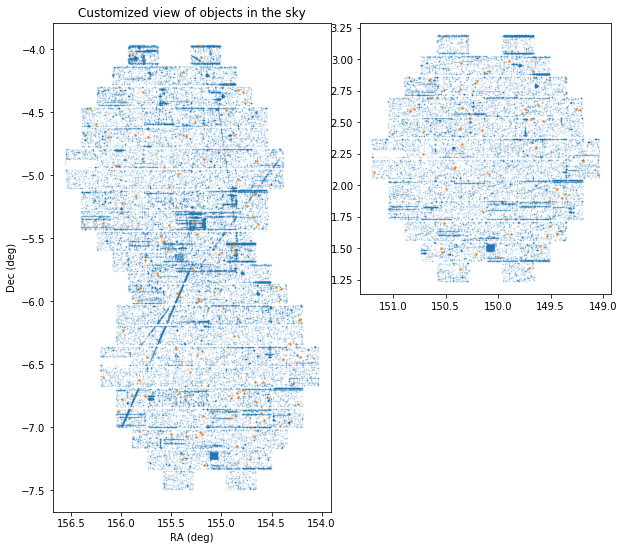

In [50]:
plot_objects_on_sky(ra1_first, dec1_first,
                    ra2_first, dec2_first,
                    ra1_second, dec1_second,
                    ra2_second, dec2_second)